In [14]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pathlib as pl
import os 
import pandas as pd

# Metrics for Model Selection

In this notebook you will fit polynomials to data to decide which order of polynomial is the best fit. Unlike before, the data you will be using is 3 dimensional, meaning it isn't possible to plot. Instead, you will write functions to calculate various metrics that are used to determine model fit. 

Complete this notebook, then answer the questions that go along side it. 

In [15]:
# set random seed for reproducibility
seed = 2022
np.random.seed(seed)

## Load the data 

In [16]:
path_csv = pl.Path(os.getcwd()) / f'M6_Performance_Metrics_Data.csv'
with open(path_csv, 'rb') as file:
    data = pd.read_csv(file)


In [17]:
print(data.head())


   Unnamed: 0        x1        x2        x3          y
0           0  0.382303 -1.596593  1.233776   4.935364
1           1  1.902436  1.579109 -0.341741  25.138660
2           2 -1.689244  1.298489 -1.472081  -4.786340
3           3 -1.510509  1.937616 -1.600244  -3.185759
4           4  1.621717  0.515558 -1.869644  19.712731


## Section 1 : Split the data into training, validation and test sets

### TO DO: write a function that splits the data into traning, validation and test sets.

The function should take as inputs the dataframe and the percentage splits for each of training, validation and test. It should output 3 dataframes, one for each of the sets. 

In [19]:
##### ANSWER ######

def split_dataframe(df, data_split):
    """function to divide a dataframe into training, validation and test dataframes
    :param df: the full dataframe which is to be divided 
    :param data_split: a list containing the fraction of the full dataframe for each
    of training, validation and test, in that order
    :return training, validation, test: dataframes for each of the sets"""
    
    training = df.sample(frac=data_split[0])
    validation = df.drop(training.index).sample(frac=data_split[1]*len(df)/len(df.drop(training.index)))
    test = df.drop(validation.index).drop(training.index)
    
    return training, validation, test

### TO DO: Use your function to split the data so the training set has 40% of the data and the validation and test sets have 30% of the data each

In [20]:
#### ANSWER ####

training, validation, test = split_dataframe(data, [0.4, 0.3, 0.3])
print(len(training))
print(len(validation))
print(len(test))


40
30
30


## Section 2: Write Metrics Functions 

### TO DO: Write the functions that calcluate the metrics you will use to evaluate the model fits

Write Functions that return:
- The mean absolute error
- The average error
- The mean absolute percentage error 
- The root mean squared error 
- The total sum of squared errors 

In [21]:
#### ANSWERS ####

def RMSE(predictions, test_y):
    return np.sqrt(np.mean((predictions - test_y)**2))

def mean_abs_error(predictions, test_y):
    return np.mean(np.abs(predictions - test_y))

def average_error(predictions, test_y):
    return np.mean(predictions - test_y)

def mean_abs_percent_error(predictions, test_y):
    return np.mean(np.abs((predictions - test_y)/test_y)*100)

def total_sum_squared_error(predictions, test_y):
    return np.sum((predictions - test_y)**2)

## Section 3: Fit models to training data and calculate performance metric on validation sets

For polynomials of order 1, 2, 3, and 4, you will use fit_model to fit each each model. This function uses scikit-learn polynomial regression. 


### TODO: write function to convert dataframe into numpy arrays

The scikit-learn functions take numpy arrays as their inputs. Therefore before you can fit any data you need to write a function to turn a dataframe with columns [x1, x2, x3, y] into two numpy arrays: X and y. X should have dimensions (N, D), where N is the number of data points and D is the dimensionality of the data (in this case 3). y should have dimensions (N, ). 


### TO DO: For polynomials of order 1 to 6 inclusive: 
1. Fit a polynomial to the training data using the fit_model function 
2. Use model.predict(X) to get the model predictions on the validation set
3. Store the model in a dictionary of models where the keys indicate the order and the items are the models
4. Store the predictions in a seperate dictionary where the keys indicate the order and the items are numpy arrays of the predictions 


In [22]:
def fit_model(X, y, order):
    """creates scikit-learn regression object and fits it to the X and y data"""
    model = Pipeline([('poly', PolynomialFeatures(degree=order)),
                      ('linear', LinearRegression(fit_intercept=False))])
    model = model.fit(X, y)
    return model 

In [23]:
### ANSWER ###

def convert_to_numpy(df):
    
    X = df[['x1', 'x2', 'x3']].to_numpy()
    y = df[['y']].to_numpy()
    return X, y

In [24]:
### ANSWER ###
X_train, y_train = convert_to_numpy(training)
X_valid, y_valid = convert_to_numpy(validation)

results_df = pd.DataFrame(columns=['order', 'RMSE', 'mean_abs_error', 'average_error', 'mean_abs_percent_error', 'total_sum_squared_error'])

models_dict = {}
predictions_dict = {}

for order in [1, 2, 3, 4, 5, 6]:
    model = fit_model(X_train, y_train, order)
    y_new = model.predict(X_valid)
    models_dict[order] = model
    predictions_dict[order] = y_new

## Section 4: Calculate metrics for each of the models

Now we want to calculate the metrics for each of the models. 


### TODO: Use the dictionary of predictions you have to caluclate and record (could be in a dataframe, or you could plot it on a graph) each of the metrics. 
1. Calculate each of the metrics for the model using the functions you wrote before
2. Store the metrics in a dataframe, with one row for each model or plot on a graph
3. Answer the questions that go alongside this notebook 

HINT: you can write a list of functions of the form:

methods = [RMSE, average_error, mean_abs_percent_error, total_sum_squared_error]

which you can then iterate over using a for loop. 



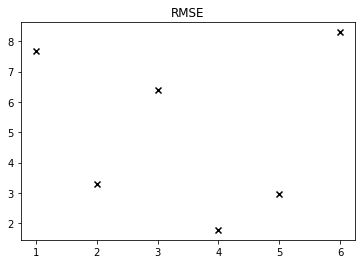

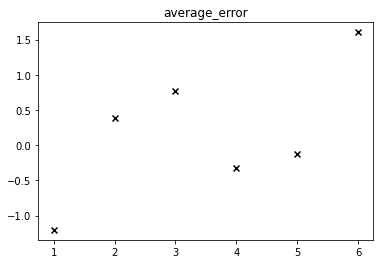

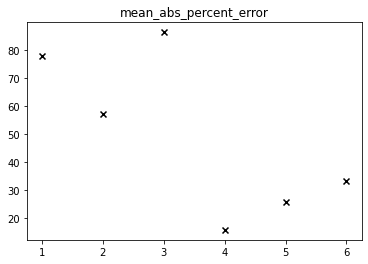

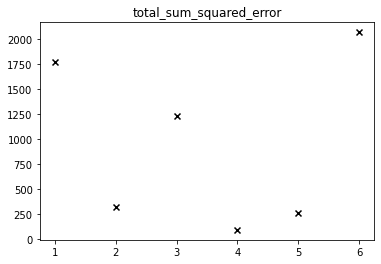

In [25]:
#### ANSWER ####

methods = [RMSE, average_error, mean_abs_percent_error, total_sum_squared_error]
method_names = ["RMSE", "average_error", "mean_abs_percent_error", "total_sum_squared_error"]
import matplotlib.pyplot as plt

for i, method in enumerate(methods):
    fig = plt.figure()
    for order in [1, 2, 3, 4, 5, 6]:
        res = method(predictions_dict[order], y_valid)
        plt.scatter(order, res, marker='x', color='k')
    plt.title(method_names[i])
    plt.show()

## Section 5: Use the test set to evaluate the performance of your chosen model

### TODO: For your selected model, calculate the RMSE, Average Error and Mean Absolute Percentage Error of the test data

In [26]:
### ANSWER ####

X_test, y_test = convert_to_numpy(test)

y_new = models_dict[4].predict(X_test)

print(RMSE(y_new, y_test))
print(average_error(y_new, y_test))
print(mean_abs_percent_error(y_new, y_test))

2.4473846308853777
0.03915056049341306
39.25300472618785
